In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [38]:
df = pd.read_csv("E:\\Datasets\\Wine.csv")
df["Customer_Segment"].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [18]:
X = df.iloc[:,0:13].values
Y = df.iloc[:,13].values

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [21]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train,Y_train)
X_test = lda.transform(X_test)

In [25]:
#fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
train_pred=classifier.predict(X_train)
y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
testing_accuracy_score = accuracy_score(Y_test,y_pred)
training_accuracy_score = accuracy_score(Y_train,train_pred)
print("testing_accuracy_score",testing_accuracy_score)
print("training_accuracy_score",training_accuracy_score)

testing_accuracy_score 1.0
training_accuracy_score 1.0


<AxesSubplot:>

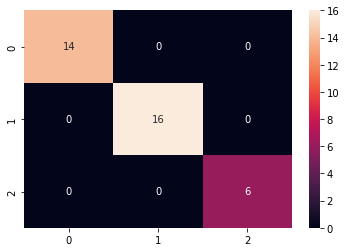

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


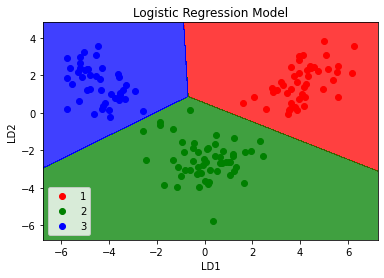

In [32]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train,Y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),
                    np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap = ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0],X_set[Y_set == j,1],
               c= ListedColormap(("red","green",'blue'))(i), label=j)
plt.title("Logistic Regression Model")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


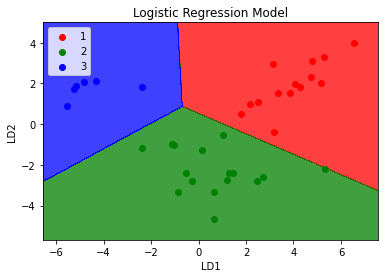

In [33]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test,Y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),
                    np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap = ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0],X_set[Y_set == j,1],
               c= ListedColormap(("red","green","blue"))(i), label=j)
plt.title("Logistic Regression Model")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()